# ASSIGNMENT PYRHON 3
Nama : Helmi Saifullah Mansur

Program : Python for Data Science

Kode Peserta : PYTN-KS04-010

# Bank Marketing Data Set
Pada assignment kali ini saya akan mengembangkan model dengan menggunakan dataset direct marketing campaigns of a portuguese banking institution. goal dari klasifikasi adalah memprediksi apakah client akan subscribe (yes/no) sebuah term deposit (variabel y).

## 1. Exploring & Preparation Dataset with Pandas (Preprocessing)
pada sesi ini akan menjelaskan tentang pre-processing yang dilakukan pada dataset sebelum dilakukan pemodelan

In [1]:
# import packages yang digunakan
import pandas as pd
import numpy as np

disini saya menggunakan dataset bank-full.csv untuk dilakukan pemodelan

In [2]:
# memasukkan dataset ke dalam pandas dataframe
df = pd.read_csv('dataset/bank/bank-full.csv', sep=';')
print('Data read into a dataframe!')

Data read into a dataframe!


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# melihat info tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# melihat list dari column headers
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [6]:
# melihat list index
df.index.values

array([    0,     1,     2, ..., 45208, 45209, 45210], dtype=int64)

In [7]:
# melihat dimensi dataframe
df.shape

(45211, 17)

In [8]:
# merubah nama kolom 'y' menjadi 'deposit'
df = df.rename(columns={'y' : 'deposit'})
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [9]:
# melihat distribusi class dari kolom deposit.
# distribusi yang normal umumnya 50:50
df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# Mengecek missing value
print(df.isnull().sum(), "\n")

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64 



dapat dilihat dataset tidak terdapat missing value

In [12]:
# Melakukan Scaler data pada kolom 'age', 'balance', 'day', 'campaign', 'pdays', 'previous'

# import function
from sklearn.preprocessing import StandardScaler

# copy df
df_new = df.copy()

# scaler numeric coloumns
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_new[num_cols] = StandardScaler().fit_transform(df_new[num_cols])

df_new.head()

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.411453,-0.25194,unknown,no


tujuan dari dilakukan scaler ini yaitu untuk menghindari terjadinya ouliers dalam pembuatan model nantinya

In [13]:
# Melakukan encoder pada categorical columns
# kolom 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
df_new['job'] = encode.fit_transform(df_new['job'])
df_new['marital'] = encode.fit_transform(df_new['marital'])
df_new['education'] = encode.fit_transform(df_new['education'])
df_new['default'] = encode.fit_transform(df_new['default'])
df_new['housing'] = encode.fit_transform(df_new['housing'])
df_new['loan'] = encode.fit_transform(df_new['loan'])
df_new['contact'] = encode.fit_transform(df_new['contact'])
df_new['month'] = encode.fit_transform(df_new['month'])
df_new['poutcome'] = encode.fit_transform(df_new['poutcome'])
df_new['deposit'] = encode.fit_transform(df_new['deposit'])

df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,261,-0.569351,-0.411453,-0.251940,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,151,-0.569351,-0.411453,-0.251940,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,76,-0.569351,-0.411453,-0.251940,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,92,-0.569351,-0.411453,-0.251940,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,198,-0.569351,-0.411453,-0.251940,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,9,1,2,0,-0.176460,0,0,0,0.143418,9,977,0.076230,-0.411453,-0.251940,3,1
45207,2.831227,5,0,0,0,0.120447,0,0,0,0.143418,9,456,-0.246560,-0.411453,-0.251940,3,1
45208,2.925401,5,1,1,0,1.429593,0,0,0,0.143418,9,1127,0.721811,1.436189,1.050473,2,1
45209,1.512791,1,1,1,0,-0.228024,0,0,1,0.143418,9,508,0.399020,-0.411453,-0.251940,3,0


**Kesimpulan**: pada tahap preprocessing ini saya melakukan load data dan mencari informasi seputar data, kemudian mengubah nama kolom y menjadi kolom deposit, kemudian saya juga melakukan pengecekan missing value dan dilanjut dengan melakukan scaling data agar menghindari terjadinya outliers. Dan terakhir melakukan enccoder data pada kolom yang bernilai kategorical.

## 2. Visualization Data
melakukan visualisasi sederhana pada data

**1. visualisasi bar chart berdasarkan kolom education dengan melihat banyaknya data di kolom deposit**

In [14]:
# menggunakan inline backend
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
# apply a style to matplotlib
mpl.style.use(['ggplot'])

In [16]:
#groupby dataframe berdasarkan major_category
df_edu = df_new.groupby('education', axis=0).sum()

df_edu

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
education,,,,,,,,,,,,,,,,
0,3180.351644,19256,6952,127,-250.487671,3894,1024,5844,-316.949459,39492,1753397,155.884356,-281.633720,-270.813237,18003,591
1,-2123.712605,103891,27004,458,-1580.399206,14038,4303,15663,-131.756573,131078,6002027,-472.123069,499.522373,-126.621916,59190,2450
2,-1681.714826,64301,16622,198,1730.568106,6378,1784,5895,447.687057,68461,3438555,265.060991,-155.914091,471.525345,33717,1996
3,625.075787,8757,2216,32,100.318771,820,133,1544,1.018975,10670,477832,51.177722,-61.974562,-74.090192,4829,252


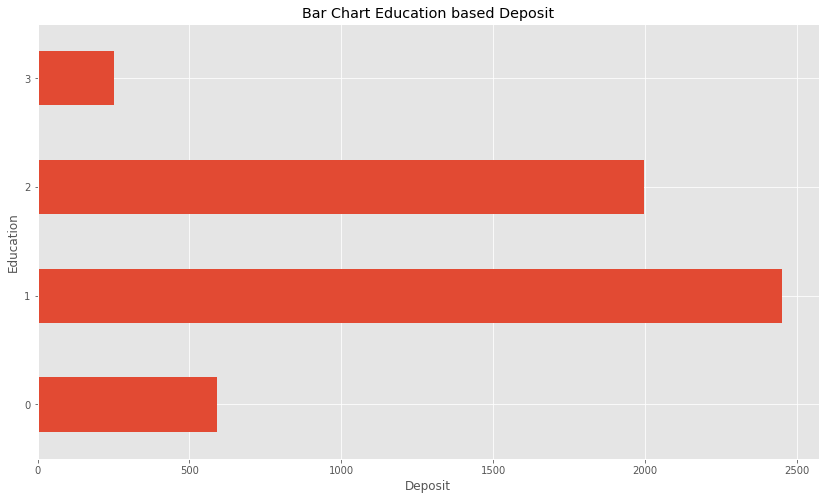

In [17]:
df_edu['deposit'].plot(kind="barh",figsize =(14,8)) #Generate plot

plt.title('Bar Chart Education based Deposit') # add title to the plot
plt.ylabel('Education') # add to x-label to the plot
plt.xlabel('Deposit') # add y-label to the plot

plt.show()

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


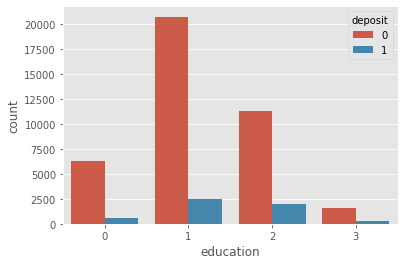

In [86]:
sns.countplot('education', hue='deposit', data=df_new)
plt.show()

**Kesimpulan:** Jadi banyaknya client dengan education kode 0 (primary) di deposit ada 591, banyaknya client dengan education kode 1 (secondary) di deposit ada 2450, banyaknya client dengan education kode 2 (tertiary) di deposit ada 1996, banyaknya client dengan education kode 3 (unknown) di deposit ada 252. Dan dapat dilihat jadi yang paling banyak adalah dengan education kode 1 (secondary)

**2. visualisasi pie chart kolom job berdasarkan kolom deposit**

In [18]:
pd.DataFrame(df.groupby(['job'], axis=0).sum())

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,203168,5873423,80483,1276703,13317,247479,3473
blue-collar,389709,10499141,150287,2558558,27415,428534,4916
entrepreneur,62738,2262426,23349,381132,4163,48307,711
housemaid,57555,1726570,19843,304823,3498,26667,461
management,382572,16680288,152408,2402292,27091,365698,6318
retired,139523,4492263,34955,650586,5313,84773,1446
self-employed,63925,2602146,25308,423420,4505,54866,871
services,160927,4141904,64950,1077210,11292,174448,2082
student,24897,1302001,13974,231364,2157,53505,894


In [19]:
df_scatter = pd.DataFrame(df_new.groupby(['job'], axis=0).sum())

#reset the index to put in back in as a column in the df_scatter dataframe
df_scatter.reset_index(inplace=True)

df_scatter

,job,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,-801.716541,6149,5876,74,-384.561186,3182,991,3345,-150.436648,30188,1276703,-314.662445,395.655307,204.977272,12898,631
1,1,-817.637102,10996,7031,201,-905.987957,7048,1684,8541,-425.487172,58783,2558558,166.980293,372.811531,-317.661768,25042,708
2,2,175.715026,1546,2142,55,77.749844,869,356,979,-18.641863,9124,381132,17.162418,-114.525523,-65.963284,3869,123
3,3,639.827359,1200,876,22,12.267959,398,152,833,29.203254,6038,304823,22.865684,-231.487599,-112.268487,3348,109
4,4,-433.452326,11294,17449,164,1246.716849,4678,1253,4403,349.766488,49055,2402292,306.842853,-144.745817,360.031230,24069,1301
5,5,4411.431197,1947,2073,26,462.464016,491,309,1383,-99.819010,11780,650586,-304.822249,-62.269345,57.370405,5762,516
6,6,-67.172031,1885,2360,33,148.163581,765,229,892,42.014971,8823,423420,45.479732,-85.953993,-19.679734,4065,187
7,7,-859.056647,4803,4311,75,-498.229089,2766,836,3084,-85.295710,24467,1077210,-61.005459,74.567050,-142.685191,10691,369
8,8,-1271.458428,1810,1443,3,7.944807,249,12,383,-102.425076,5154,231364,-140.569535,157.792969,151.799215,2214,269
9,9,-1160.165865,9292,9891,130,-273.565877,4115,1309,4111,549.678599,37731,1921319,350.583347,-227.828193,-18.979060,19557,840


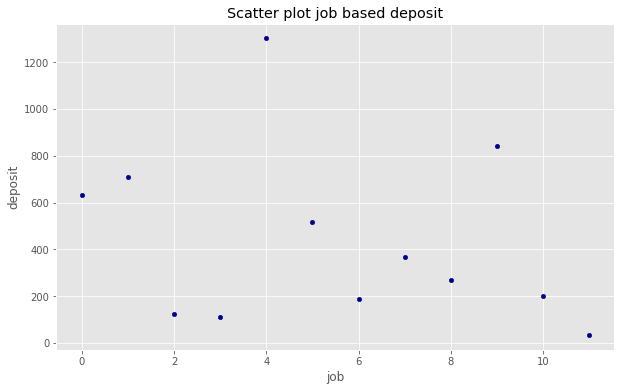

In [20]:
# Plot datanya
df_scatter.plot(kind='scatter', x='job', y='deposit', figsize=(10,6), color='darkblue')

plt.title('Scatter plot job based deposit') # add a title to the area plot
plt.ylabel('deposit') # add y-label
plt.xlabel('job') # add x-label

plt.show()

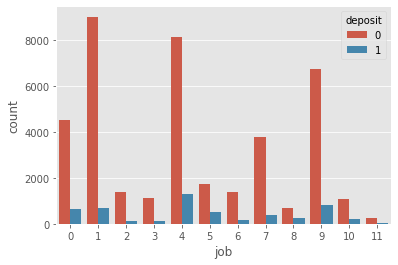

In [85]:
sns.countplot('job', hue='deposit', data=df_new)
plt.show()

**Kesimpulan:** dari hasil scatter plot job based deposit dapat dilihat bahwa paling banyak yaitu job deengan kode 4 (management) dengan jumlah deposit 1301, dan yang paling sedikit yaitu job dengan kode 11 (unknown) dengan jumlah deposit hanya 34

## 3. Pemodelan
disini saya akan melakukan pemilihan feature dan target serta melakukan splitting data

In [21]:
# Memilih dan memisahkan feature dan Target

# pilih feature
X = df_new.drop('deposit', axis=1)

In [22]:
# pilih target
y = df_new['deposit']

disini saya menggunakan deposit sebagai target, dan kolom selain deposit sebagai feature.

In [23]:
# splitting data 80% training 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)


print('Shape training feature:', X_train.shape)
print('Shape testing feature:', X_test.shape)
print('Shape training label:', y_train.shape)
print('Shape training label:', y_test.shape)

Shape training feature: (36168, 16)
Shape testing feature: (9043, 16)
Shape training label: (36168,)
Shape training label: (9043,)


## 4. Logistic Regression
implementasi logistic regression dengan scikit-learn

In [24]:
#(a)LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, y_pred))

matrix=confusion_matrix(y_test, y_pred)
print(matrix)

0.8904124737365918
[[7836  157]
 [ 834  216]]


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.21      0.30      1050

   micro avg       0.89      0.89      0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



Text(0.5, 1.0, 'Confusion Metrics for Logistic Regression')

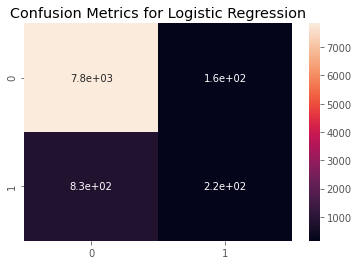

In [28]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Confusion Metrics for Logistic Regression')

In [29]:
tn,fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 7836 
False Positif (FP) : 157 
False Negatif (FN) : 834 
True Positif (TP) : 216 


**Kesimpulan:** Dengan menggunakan pemodelan Logistic Regression didapatkan hasil akurasi prediksi yaitu 89% (0.8904124737365918) dengan jumlah nilai True Negatif (TN) 7836, False Positif (FP) 157, False Negatif (FN) 834, dan True Positif (TP) 216. Bisa dikatakan hasil akurasi cukup baik dengan nilai 89%

## 5. K-Nearest Neighbors (KNN)
Implementasi K-Nearest Neighbors (KNN) dengan scikit-learn

In [30]:
# (b) K-NEAREST NEIGHBORS (KNN) ALGORITHM
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
y_pred1 = knn.predict(X_test)

In [32]:
print('Accuration:', accuracy_score(y_test, y_pred1))

matrix=confusion_matrix(y_test, y_pred1)
print('confusion matrix \n', matrix)

Accuration: 0.8815658520402522
confusion matrix 
 [[7737  256]
 [ 815  235]]


In [33]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7993
           1       0.48      0.22      0.30      1050

   micro avg       0.88      0.88      0.88      9043
   macro avg       0.69      0.60      0.62      9043
weighted avg       0.86      0.88      0.86      9043



Text(0.5, 1.0, 'Confusion Metrics for KNN')

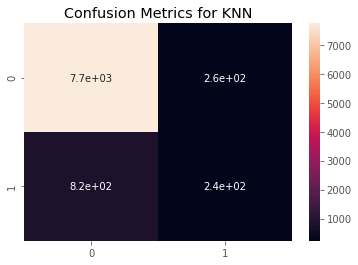

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True)
plt.title('Confusion Metrics for KNN')

In [35]:
tn,fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 7737 
False Positif (FP) : 256 
False Negatif (FN) : 815 
True Positif (TP) : 235 


**Kesimpulan:** Dengan menggunakan pemodelan K-Nearest Neighbors (KNN) didapatkan hasil akurasi prediksi yaitu 88% (0.8815658520402522) dengan jumlah nilai True Negatif (TN) 7737, False Positif (FP) 256, False Negatif (FN) 815, dan True Positif (TP) 235. Bisa dikatakan hasil akurasi cukup baik dengan nilai 88%

## 6. Support Vector Machine (SVM)
Implementasi Support Vector Machine (SVM) dengan scikit-learn

In [36]:
# (c) SUPPORT VECTOR MACHINE (SVM) ALGORITHM
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train, y_train)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
y_pred2 = svm.predict(X_test)

In [38]:
print('Accuration:', accuracy_score(y_test, y_pred2))

matrix=confusion_matrix(y_test, y_pred2)
print('confusion matrix \n', matrix)

Accuration: 0.883777507464337
confusion matrix 
 [[7882  111]
 [ 940  110]]


In [39]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7993
           1       0.50      0.10      0.17      1050

   micro avg       0.88      0.88      0.88      9043
   macro avg       0.70      0.55      0.56      9043
weighted avg       0.85      0.88      0.85      9043



Text(0.5, 1.0, 'Confusion Metrics for SVM')

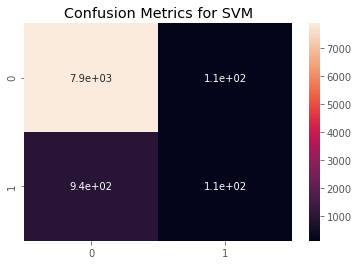

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)
plt.title('Confusion Metrics for SVM')

In [41]:
tn,fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 7882 
False Positif (FP) : 111 
False Negatif (FN) : 940 
True Positif (TP) : 110 


**Kesimpulan:** Dengan menggunakan pemodelan Support Vector Machine (SVM) didapatkan hasil akurasi prediksi yaitu 88% (0.883777507464337) dengan jumlah nilai True Negatif (TN) 7882, False Positif (FP) 111, False Negatif (FN) 940, dan True Positif (TP) 110. Bisa dikatakan hasil akurasi cukup baik dengan nilai 88%

## 7. Decision Tree
Implementasi Decision Tree dengan scikit-learn

In [70]:
# (d) DECISION TREE ALGORITHM
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
y_pred3 = dt.predict(X_test)

In [72]:
print('Accuration:', accuracy_score(y_test, y_pred3))

matrix=confusion_matrix(y_test, y_pred3)
print('confusion matrix \n', matrix)

Accuration: 0.872055733716687
confusion matrix 
 [[7378  615]
 [ 542  508]]


In [73]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7993
           1       0.45      0.48      0.47      1050

   micro avg       0.87      0.87      0.87      9043
   macro avg       0.69      0.70      0.70      9043
weighted avg       0.88      0.87      0.87      9043



Text(0.5, 1.0, 'Confusion Metrics for Decision Tree')

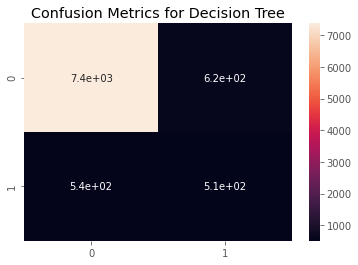

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True)
plt.title('Confusion Metrics for Decision Tree')

In [75]:
tn,fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 7378 
False Positif (FP) : 615 
False Negatif (FN) : 542 
True Positif (TP) : 508 


**Kesimpulan:** Dengan menggunakan pemodelan Decision Tree didapatkan hasil akurasi prediksi yaitu 87% (0.872055733716687) dengan jumlah nilai True Negatif (TN) 7378, False Positif (FP) 615, False Negatif (FN) 542, dan True Positif (TP) 508. Bisa dikatakan hasil akurasi cukup baik dengan nilai 87%

## 8. Random Forest
Implementasi Random Forest dengan scikit-learn

In [76]:
# (e) RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
y_pred4 = rf.predict(X_test)

In [78]:
print('Accuration:', accuracy_score(y_test, y_pred4))

matrix=confusion_matrix(y_test, y_pred4)
print('confusion matrix \n', matrix)

Accuration: 0.9029083268826716
confusion matrix 
 [[7770  223]
 [ 655  395]]


In [79]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7993
           1       0.64      0.38      0.47      1050

   micro avg       0.90      0.90      0.90      9043
   macro avg       0.78      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



Text(0.5, 1.0, 'Confusion Metrics for Random Forest')

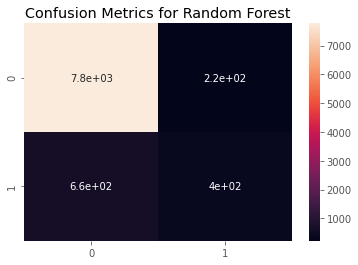

In [80]:
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True)
plt.title('Confusion Metrics for Random Forest')

In [81]:
tn,fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 7770 
False Positif (FP) : 223 
False Negatif (FN) : 655 
True Positif (TP) : 395 


**Kesimpulan:** Dengan menggunakan pemodelan Random Forest didapatkan hasil akurasi prediksi yaitu 90% (0.9029083268826716) dengan jumlah nilai True Negatif (TN) 7770, False Positif (FP) 223, False Negatif (FN) 655, dan True Positif (TP) 395. Bisa dikatakan hasil akurasi baik dengan nilai 90% hampir sempurna.

## 9. Naive Bayes
Implementasi Naive Bayes dengan scikit-learn

In [55]:
# (f) NAIVE BAYES ALGORITHM
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
y_pred5 = nb.predict(X_test)

In [57]:
print('Accuration:', accuracy_score(y_test, y_pred5))

matrix=confusion_matrix(y_test, y_pred5)
print('confusion matrix \n', matrix)

Accuration: 0.8333517637952007
confusion matrix 
 [[7025  968]
 [ 539  511]]


In [58]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7993
           1       0.35      0.49      0.40      1050

   micro avg       0.83      0.83      0.83      9043
   macro avg       0.64      0.68      0.65      9043
weighted avg       0.86      0.83      0.85      9043



Text(0.5, 1.0, 'Confusion Metrics for Naive Bayes')

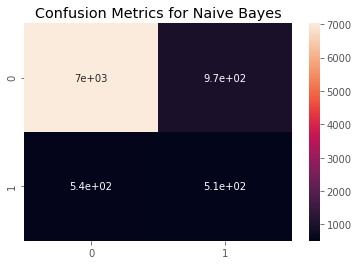

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True)
plt.title('Confusion Metrics for Naive Bayes')

In [60]:
tn,fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 7025 
False Positif (FP) : 968 
False Negatif (FN) : 539 
True Positif (TP) : 511 


**Kesimpulan:** Dengan menggunakan pemodelan Naive Bayes didapatkan hasil akurasi prediksi yaitu 83% (0.8333517637952007) dengan jumlah nilai True Negatif (TN) 7025, False Positif (FP) 968, False Negatif (FN) 539, dan True Positif (TP) 511. Bisa dikatakan hasil akurasi cukup baik dengan nilai 83% tetapi jika dibandingkan dengan model lain cukup rendah.

## 10. Overall Analysis (Algorithm Analysys)

In [82]:
print("Logistic Regression:", accuracy_score(y_test, y_pred))
print("Decision Tree:", accuracy_score(y_test, y_pred3))
print("Random Forest:", accuracy_score(y_test, y_pred4))
print("SVM:", accuracy_score(y_test, y_pred2))
print("Naive Bayes:", accuracy_score(y_test, y_pred5))
print("KNN:", accuracy_score(y_test, y_pred1))

Logistic Regression: 0.8904124737365918
Decision Tree: 0.872055733716687
Random Forest: 0.9029083268826716
SVM: 0.883777507464337
Naive Bayes: 0.8333517637952007
KNN: 0.8815658520402522


Berdasarkan analisis beberapa pemodelan yang saya lakukan saya menyimpulkan bahwa pemodelan yang menghasilkan nilai prediksi dan akurasi yang paling bagus yaitu pemodelan dengan menggunakan metode Random Forest. Nilai akurasi yang didapatkan yaitu 89,7% atau dibulatkan menjadi 90% (0.8976003538648678). Nilai ini cukup bagus menurut saya karena nilai akurasi sudah cukup mendekati sempurna.

Sedangkan untuk hasil pemodelan dengan hasil nilai prediksi atau nilai akurasi paling rendah yaitu pemodelan dengan menggunakan Naive Bayes. Nilai yang didapatkan yaitu 83% (0.8333517637952007). Jika dibandingkan ini cukup jauh perbandingannya dengan model yang lain dimana model lain hasil akurasi berada di sekitar 87% - 90%, tetapi pemodelan Naive Bayes hanya 83%.

Jadi untuk dataset direct marketing campaigns of a portuguese banking institution. Untuk memprediksi apakah client akan subscribe (yes/no) sebuah term deposit (variabel y) maka pemodelan yang cocok dilakukan adalah dengan menggunakan **pemodelan Random Forest.**

In [83]:
# write the results in csv file for Random Forest

predictions = pd.DataFrame(y_pred4, columns=["predictions"]).to_csv("H8_RF_Deposit_Predictions.csv")